In [1]:
import pandas as pd


df = pd.read_excel('db.xlsx')
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
3,2022-10-01,10,1,1040,229.466667,94.95,16.555333,NaN,NaN,1865.0
4,2022-10-01,10,1,1042,NaN,60.46,NaN,77.514286,47.216396,1519.0


In [13]:
df.describe()

,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
count,19057.000000,19057.000000,19057.000000,17937.000000,18552.000000,18275.000000,17242.000000,18118.000000,18337.000000
mean,6.048696,1.499082,1332.006822,221.680695,81.245005,19.401021,114.328822,36.140689,1550.970333
std,3.085022,0.500012,196.299550,9.585327,18.486391,1.742872,62.489313,31.579008,327.096777
min,1.000000,1.000000,1035.000000,190.000000,20.010000,15.001667,-49.918182,0.000000,500.000000
25%,3.000000,1.000000,1044.000000,216.541667,72.390000,18.318582,79.455385,8.799751,1380.000000
50%,6.000000,1.000000,1385.000000,223.444444,84.570000,19.513448,119.026500,29.265572,1594.000000
75%,9.000000,2.000000,1493.000000,228.272727,94.170000,20.540000,154.990170,56.853116,1774.000000
max,11.000000,2.000000,1888.000000,249.562500,119.950000,24.975200,249.875000,320.915607,2486.000000


In [14]:
df.isnull().mean() * 100

Дата для смены                0.000000
Месяц                         0.000000
Смена                         0.000000
Самосвал                      0.000000
Avg-Вес по СКЗ, т             5.877106
Sum-Расстояние, км            2.649945
Avg-Средняя скорость, км/ч    4.103479
Avg-Перепад высот             9.524059
StDev-Перепад высот           4.927323
Расход топлива, л             3.778139
dtype: float64

In [ ]:
хочу проверить нормальность распределения переменных: 
- Средний вес в кузове автомобиля Белаз за смену
- Пройденное расстояние за смену
- Средняя скорость за смену
- Потраченный объем топлива за смену

Нулевая гипотеза - данные распределены нормально.


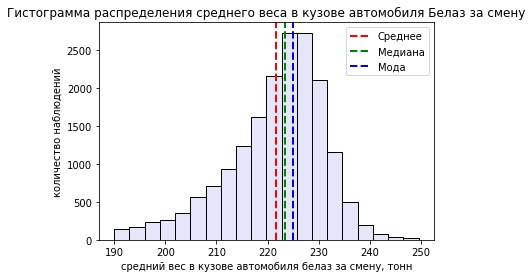

In [3]:
import matplotlib.pyplot as plt

avg_weight = df['Avg-Вес по СКЗ, т'].dropna()
# 17937 строк с данными
plt.hist(avg_weight, bins=20, edgecolor='black', color='#E6E6FA')

plt.xlabel('средний вес в кузове автомобиля белаз за смену, тонн')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего веса в кузове автомобиля Белаз за смену')
plt.axvline(avg_weight.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_weight.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_weight.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.show()

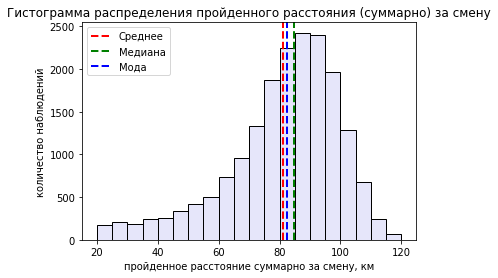

In [4]:
dist = df['Sum-Расстояние, км'].dropna()
# 18552 строки с данными
plt.hist(dist, bins=20, edgecolor='black', color='#E6E6FA')

plt.xlabel('пройденное расстояние суммарно за смену, км')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения пройденного расстояния (суммарно) за смену')
plt.axvline(dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(dist.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(dist.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.show()

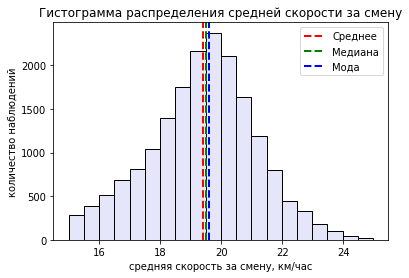

Все моды скорости за смену: 19.61, 20.03, 20.37, 20.45


In [5]:
avg_speed = df['Avg-Средняя скорость, км/ч'].dropna()
# 18275 строк с данными
plt.hist(avg_speed, bins=20, edgecolor='black', color='#E6E6FA')

plt.xlabel('средняя скорость за смену, км/час')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения средней скорости за смену')
plt.axvline(avg_speed.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_speed.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_speed.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.show()


print(f'Все моды скорости за смену: {", ".join(map(str, avg_speed.mode().tolist()))}')

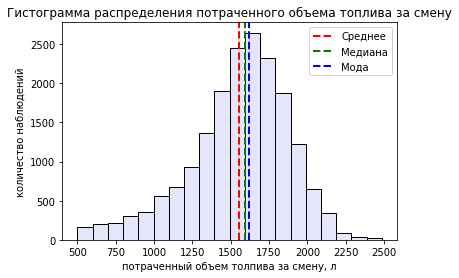

Все моды потраченного топлива: 1621.0, 1632.0, 1639.0


In [6]:
fuel = df['Расход топлива, л'].dropna()
# 18337 строк с данными
plt.hist(fuel, bins=20, edgecolor='black', color='#E6E6FA')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(fuel.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(fuel.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(fuel.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()
plt.show()

print(f'Все моды потраченного топлива: {", ".join(map(str, fuel.mode().tolist()))}')

In [15]:
from scipy.stats import shapiro

# проводим тест Шапиро-Уилка
stat, p = shapiro(fuel)

# выводим результаты теста
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Распределение не отклоняется от нормального')
else:
    print('Распределение отклоняется от нормального')


Statistics=0.969, p=0.000
Распределение отклоняется от нормального


/home/anya-mankova/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


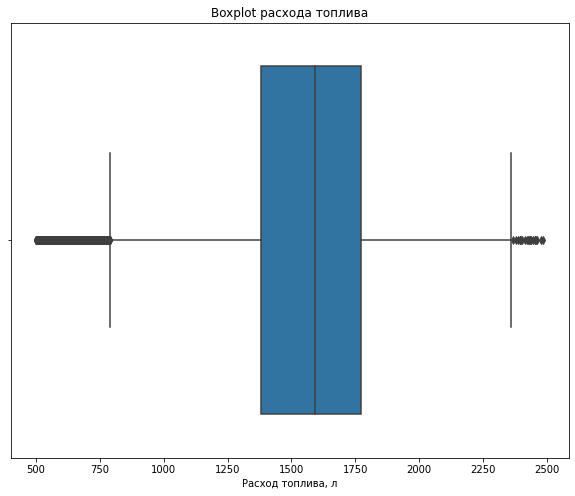

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.boxplot(x=fuel)
plt.xlabel('Расход топлива, л')
plt.title('Boxplot расхода топлива')
plt.show()


In [18]:
corr = df[['Месяц', 'Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Месяц,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,"Расход топлива, л"
Месяц,1.000000,0.042324,-0.185448,-0.010529,-0.292010,-0.184805
"Avg-Вес по СКЗ, т",0.042324,1.000000,-0.028966,-0.094823,0.037607,0.042620
"Sum-Расстояние, км",-0.185448,-0.028966,1.000000,0.353275,0.219744,0.779390
"Avg-Средняя скорость, км/ч",-0.010529,-0.094823,0.353275,1.000000,-0.211802,-0.044083
Avg-Перепад высот,-0.292010,0.037607,0.219744,-0.211802,1.000000,0.479031
"Расход топлива, л",-0.184805,0.042620,0.779390,-0.044083,0.479031,1.000000
